In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

3:44pm 부터

# keras를 이용한 선형회귀, 로지스틱 회귀, 소프트맥스

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np

Using TensorFlow backend.


## 선형회귀

In [0]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])    # 공부 시간
y = np.array([12, 23, 34, 45, 56, 77, 88, 100, 90])    # 점수

In [0]:
# 7.5시간 공부했을 때 점수는?
model = Sequential()
# model.add(Dense(출력의 차원, 입력의 차원, 활성화함수))
model.add(Dense(1, input_dim=1, activation="linear"))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss="mse", metrics=["mse"])    # 모델 만드는 함수
model.fit(x, y, batch_size=1, epochs=300, shuffle=False)

W0812 07:04:48.833577 140557892659072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0812 07:04:48.847906 140557892659072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/300
9/9 [==============================] - 0s 51ms/step - loss: 588.8276 - mean_squared_error: 588.8276
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 94.0732 - mean_squared_error: 94.0732
Epoch 3/300
9/9 [==============================] - 0s 1ms/step - loss: 93.5934 - mean_squared_error: 93.5934
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 93.1895 - mean_squared_error: 93.1895
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 92.8552 - mean_squared_error: 92.8552
Epoch 6/300
9/9 [==============================] - 0s 1ms/step - loss: 92.5846 - mean_squared_error: 92.5846
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 92.3718 - mean_squared_error: 92.3718
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 92.2123 - mean_squared_error: 92.2123
Epoch 9/300
9/9 [==============================] - 0s 1ms/step - loss: 92.1010 - mean_squared_error: 92.1010
Epoch 10/300
9/9

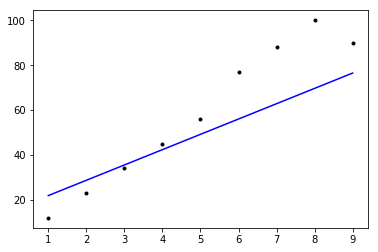

In [0]:
import matplotlib.pyplot as plt
plt.plot(x, model.predict(x), "b", x, y, "k.")    # "b": 파랑, "k.": 까만 점

In [0]:
print(model.predict([7.5]))

[[66.25939]]


## 로지스틱 회귀

In [0]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])    # 공부 시간
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1])    # 합격 여부

model = Sequential()
# model.add(Dense(출력의 차원, 입력의 차원, 활성화함수))
model.add(Dense(1, input_dim=1, activation="sigmoid"))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss="binary_crossentropy", metrics=["binary_accuracy"])    # 모델 만드는 함수
model.fit(x, y, batch_size=1, epochs=300, shuffle=False)

W0812 07:26:09.769678 140557892659072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/300
9/9 [==============================] - 0s 17ms/step - loss: 1.6645 - binary_accuracy: 0.4444
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 1.4252 - binary_accuracy: 0.4444
Epoch 3/300
9/9 [==============================] - 0s 1ms/step - loss: 1.2027 - binary_accuracy: 0.4444
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 1.0066 - binary_accuracy: 0.4444
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 0.8490 - binary_accuracy: 0.4444
Epoch 6/300
9/9 [==============================] - 0s 1ms/step - loss: 0.7394 - binary_accuracy: 0.4444
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6750 - binary_accuracy: 0.4444
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6420 - binary_accuracy: 0.4444
Epoch 9/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6256 - binary_accuracy: 0.5556
Epoch 10/300
9/9 [==============================] - 0s 1ms/step

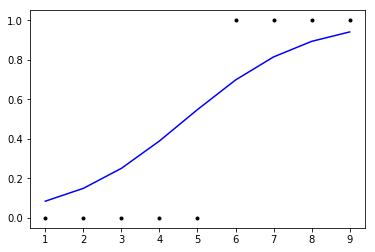

In [0]:
plt.plot(x, model.predict(x), "b", x, y, "k.")

In [0]:
print(model.predict([15, 17]))
print(model.predict([0.5, 1.5]))

[[0.9986786 ]
 [0.99963486]]
[[0.06278118]
 [0.11307196]]


In [0]:
# hx = w1x1 + w2x2 + w3x3 + b
x = np.array([[100, 90, 80], [55, 45, 36], [77, 88, 90]])    # 중간, 기말, 최종 성적
y = np.array([92, 70, 88])    # 100, 90, 80점을 받았던 학생은 92점, 55, 45, 36점을 받았던 학생은 70점, 77, 88, 90점을 받았던 학생은 88점

# 7.5시간 공부했을 때 점수는?
model = Sequential()
# model.add(Dense(출력의 차원, 입력의 차원, 활성화함수))
model.add(Dense(1, input_dim=3, activation="linear"))
sgd = optimizers.SGD(lr=0.00001)
model.compile(optimizer=sgd, loss="mse", metrics=["mse"])    # 모델 만드는 함수
model.fit(x, y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
3/3 [==============================] - 0s 44ms/step - loss: 735.7797 - mean_squared_error: 735.7797
Epoch 2/300
3/3 [==============================] - 0s 2ms/step - loss: 724.1487 - mean_squared_error: 724.1487
Epoch 3/300
3/3 [==============================] - 0s 3ms/step - loss: 718.2950 - mean_squared_error: 718.2950
Epoch 4/300
3/3 [==============================] - 0s 2ms/step - loss: 708.1427 - mean_squared_error: 708.1427
Epoch 5/300
3/3 [==============================] - 0s 3ms/step - loss: 696.7215 - mean_squared_error: 696.7215
Epoch 6/300
3/3 [==============================] - 0s 3ms/step - loss: 685.1409 - mean_squared_error: 685.1409
Epoch 7/300
3/3 [==============================] - 0s 1ms/step - loss: 673.6963 - mean_squared_error: 673.6963
Epoch 8/300
3/3 [==============================] - 0s 2ms/step - loss: 662.4590 - mean_squared_error: 662.4590
Epoch 9/300
3/3 [==============================] - 0s 3ms/step - loss: 651.4442 - mean_squared_error: 651.4442


In [0]:
model.predict(x)

array([[103.18049 ],
       [ 55.564484],
       [ 86.51259 ]], dtype=float32)

## (변수가 여러개인) 다중 로지스틱 회귀

In [0]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

model = Sequential()
# model.add(Dense(출력의 차원, 입력의 차원, 활성화함수))
model.add(Dense(1, input_dim=2, activation="sigmoid"))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss="binary_crossentropy", metrics=["binary_accuracy"])    # 모델 만드는 함수
model.fit(x, y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
4/4 [==============================] - 0s 40ms/step - loss: 0.9169 - binary_accuracy: 0.2500
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.9043 - binary_accuracy: 0.2500
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 0.8920 - binary_accuracy: 0.2500
Epoch 4/300
4/4 [==============================] - 0s 1ms/step - loss: 0.8801 - binary_accuracy: 0.2500
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.8686 - binary_accuracy: 0.2500
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.8573 - binary_accuracy: 0.2500
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 0.8464 - binary_accuracy: 0.2500
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.8357 - binary_accuracy: 0.2500
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 0.8254 - binary_accuracy: 0.2500
Epoch 10/300
4/4 [==============================] - 0s 2ms/step

In [0]:
model.predict(x)

array([[0.60383964],
       [0.8450779 ],
       [0.7816337 ],
       [0.9275888 ]], dtype=float32)